Matplotlib is building the font cache; this may take a moment.


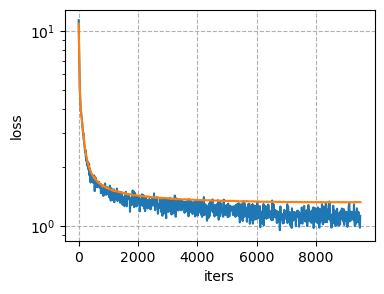

In [1]:
import matplotlib.pyplot as plt

# Read the training log file and extract the data
train_iters = []
train_loss = []
with open('log/train_log.txt', 'r') as file:
  next(file) # Skip the header line    
  for i1, line in enumerate(file):
    # Split the line by '|' and strip whitespace
    parts = [part.strip() for part in line.split('|')]
    # Check if we have enough parts and the first part can be converted to int
    try:
      iter = int(parts[0])
      loss = float(parts[1])
      train_iters.append(iter)
      train_loss.append(loss)
    except (ValueError, IndexError):
      continue

val_iters = []
val_loss = []
with open('log/val_log.txt', 'r') as file:
  next(file) # Skip the header line    
  for line in file:
    # Split the line by '|' and strip whitespace
    parts = [part.strip() for part in line.split('|')]
    # Check if we have enough parts and the first part can be converted to int
    try:
      iter = int(parts[0])
      loss = float(parts[1])
      val_iters.append(iter)
      val_loss.append(loss)
    except (ValueError, IndexError):
      continue

# Create the plot
plt.figure(figsize=(4, 3))
plt.semilogy(train_iters, train_loss)
plt.semilogy(val_iters, val_loss)

# Add labels and title
plt.xlabel('iters')
plt.ylabel('loss')

# Add grid
plt.grid(True, linestyle='--')

# Display the plot
plt.show()

In [2]:
from dataclasses import dataclass
from gpt import GPT
import torch
from transformers import AutoTokenizer

@dataclass
class GPTConfig:
  block_size: int = 2048
  vocab_size: int = 50257
  n_layer: int = 12
  n_head: int = 12
  n_embd: int = 768

# autodetect GPU
device = "cpu"
if torch.cuda.is_available():
  device = "cuda"
# elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
#   device = "mps"
print(f"using {device}")
checkpoint = torch.load("log/checkpoint_00999.pt", map_location=torch.device(device), weights_only=False)

model = GPT(checkpoint["model_config"])
model.to(device)
model = torch.compile(model)
model.load_state_dict(checkpoint["model_state"])
model.eval()

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
prompt = torch.tensor([[tokenizer.eos_token_id]], dtype=torch.long).to(device) # start generation with <|endoftext|> token
generation = model.generate(prompt, max_new_tokens=200)[0]
print(tokenizer.decode(generation.tolist()))

/Users/yuekai/miniforge3/envs/nanogpt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


import error: No module named 'triton'
using cpu
<|endoftext|>Mum and Dad wanted to go out to the factory with their things. 

Mum said it was too early to go there and the factory wasn't too deep.

Mum and Dad tried to stay still but could not go ahead.

Suddenly, Mum said it had to be safe and play. She was worried about what she should do about it. 

When Dad saw what Mum and Dad doing. He ran over to them and helped put out the things they were supposed to.

Then, he smiled and said they could go.

Mum and Dad were surprised to see an old man who was deaf at the back of the factory. Dad laughed and said he was a little too. 

Mum and Dad said it was ok too. Even though they were happy, they were relieved that they were so excited. 

The End.<|endoftext|>Once there was a little girl called Sarah. She was three years old and
